In [1]:
import json
kaggle_credentails = json.load(open("kaggle.json"))
import os
import json
from zipfile import ZipFile
from PIL import Image
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [2]:
!kaggle datasets download -d mayankanand2701/top-200-richest-worlds-billionaires-dataset

Dataset URL: https://www.kaggle.com/datasets/mayankanand2701/top-200-richest-worlds-billionaires-dataset
License(s): MIT
  0% 0.00/4.51k [00:00<?, ?B/s]
100% 4.51k/4.51k [00:00<00:00, 10.3MB/s]


In [3]:
# Unzip the downloaded dataset
with ZipFile("/content/top-200-richest-worlds-billionaires-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/Top 200 Richest Person in the World.csv", encoding='latin1')


In [7]:
df.head()

,S. No.,Rank,Name,Age,Country,Networth,Industry
0,1,1,Bernard Arnault & family,75,France,$233 B,Fashion & Retail
1,2,2,Elon Musk,52,United States,$195 B,Automotive
2,3,3,Jeff Bezos,60,United States,$194 B,Technology
3,4,4,Mark Zuckerberg,39,United States,$177 B,Technology
4,5,5,Larry Ellison,79,United States,$141 B,Technology


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S. No.    200 non-null    int64 
 1   Rank      200 non-null    int64 
 2   Name      200 non-null    object
 3   Age       200 non-null    int64 
 4   Country   200 non-null    object
 5   Networth  200 non-null    object
 6   Industry  200 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.1+ KB


In [9]:
df.describe()

,S. No.,Rank,Age
count,200.000000,200.000000,200.000000
mean,100.500000,99.960000,69.380000
std,57.879185,57.411312,13.995893
min,1.000000,1.000000,31.000000
25%,50.750000,50.750000,59.000000
50%,100.500000,100.500000,71.000000
75%,150.250000,150.000000,79.000000
max,200.000000,200.000000,100.000000


In [12]:
df.isna().sum()

S. No.      0
Rank        0
Name        0
Age         0
Country     0
Networth    0
Industry    0
dtype: int64

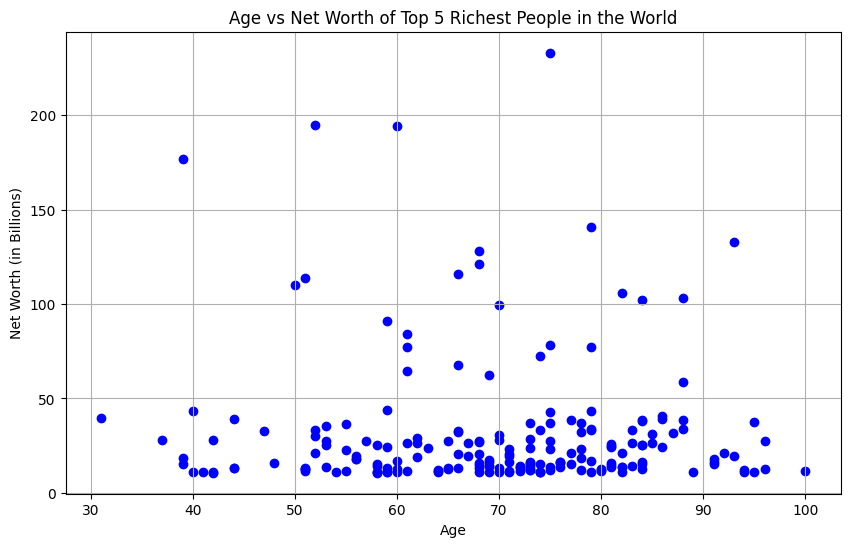

In [15]:
# Preprocess Networth column to convert it to numeric
df['Networth'] = df['Networth'].replace({'\$': '', ' B': ''}, regex=True).astype(float)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Networth'], color='blue')
plt.title('Age vs Net Worth of Top 5 Richest People in the World')
plt.xlabel('Age')
plt.ylabel('Net Worth (in Billions)')
plt.grid(True)
plt.show()

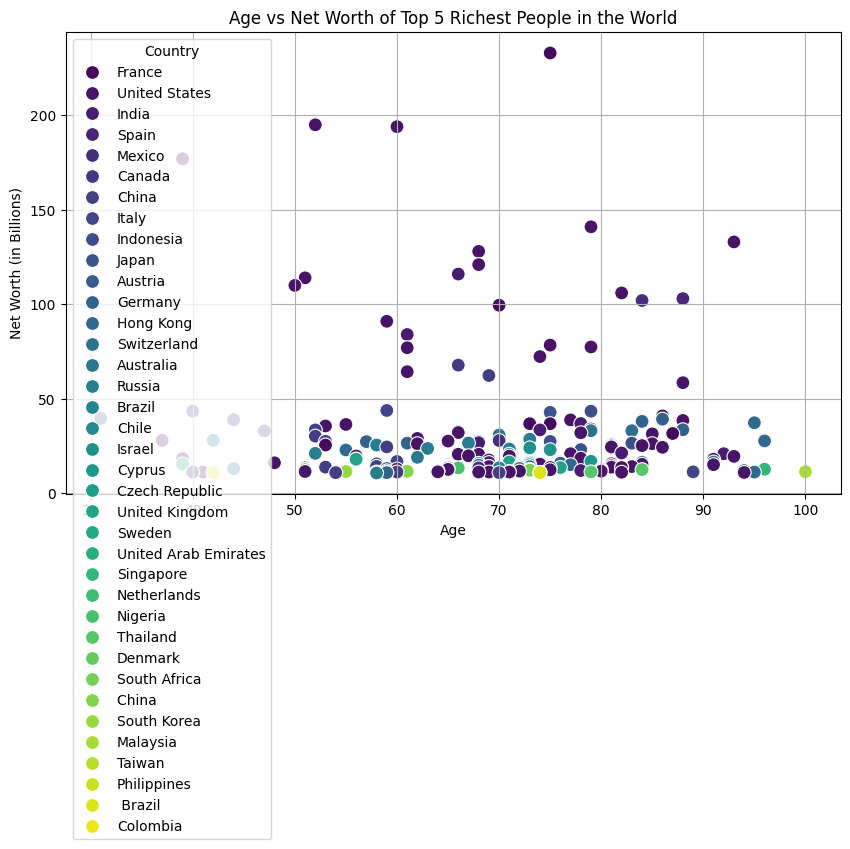

In [16]:

# Plot the graph with hue of country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Networth', hue='Country', palette='viridis', s=100)
plt.title('Age vs Net Worth of Top 5 Richest People in the World')
plt.xlabel('Age')
plt.ylabel('Net Worth (in Billions)')
plt.grid(True)
plt.legend(title='Country')
plt.show()

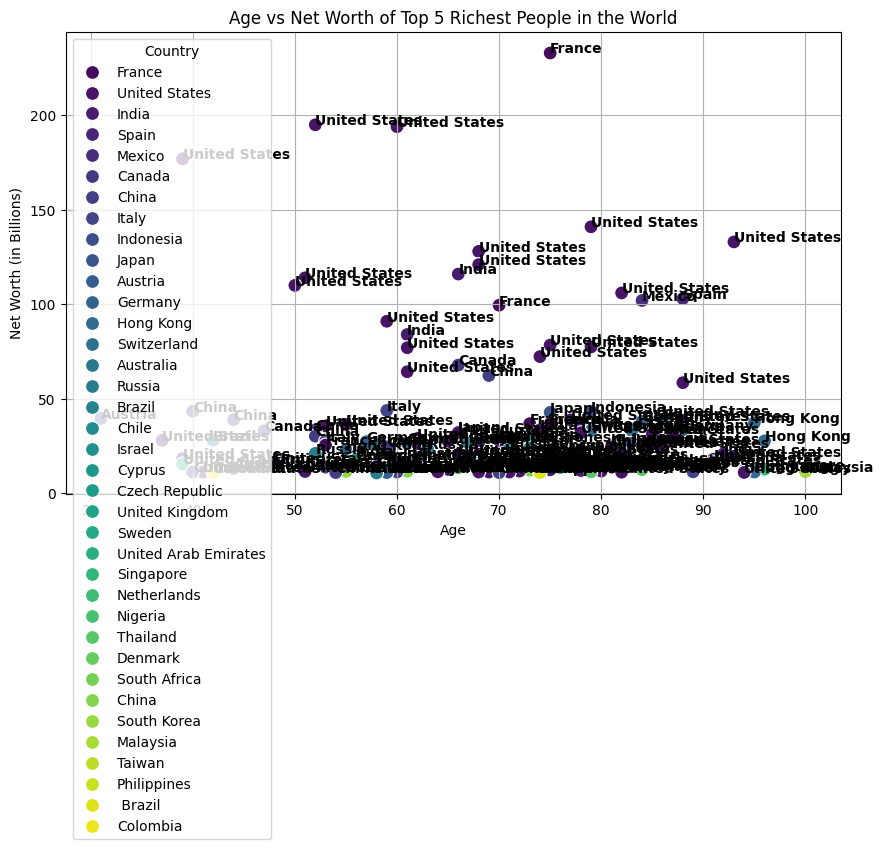

In [17]:
# Plot the graph with hue of country
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='Age', y='Networth', hue='Country', palette='viridis', s=100)

# Annotate each point with the country name
for line in range(0, df.shape[0]):
     scatter_plot.text(df.Age[line], df.Networth[line],
         df.Country[line], horizontalalignment='left',
         size='medium', color='black', weight='semibold')

plt.title('Age vs Net Worth of Top 5 Richest People in the World')
plt.xlabel('Age')
plt.ylabel('Net Worth (in Billions)')
plt.grid(True)
plt.legend(title='Country')
plt.show()

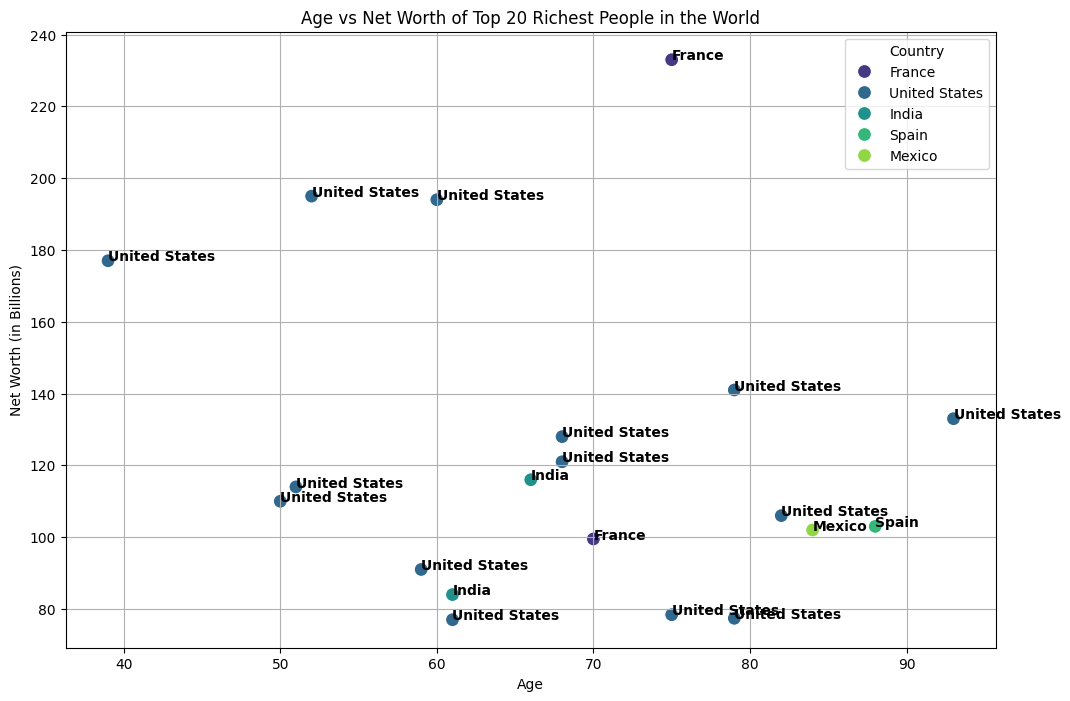

In [18]:

# Filter to include only top 20
top_20_df = df.head(20)

# Plot the graph with hue of country
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=top_20_df, x='Age', y='Networth', hue='Country', palette='viridis', s=100)

# Annotate each point with the country name
for line in range(0, top_20_df.shape[0]):
     scatter_plot.text(top_20_df.Age[line], top_20_df.Networth[line],
         top_20_df.Country[line], horizontalalignment='left',
         size='medium', color='black', weight='semibold')

plt.title('Age vs Net Worth of Top 20 Richest People in the World')
plt.xlabel('Age')
plt.ylabel('Net Worth (in Billions)')
plt.grid(True)
plt.legend(title='Country')
plt.show()

<ipython-input-19-b097d739a38d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


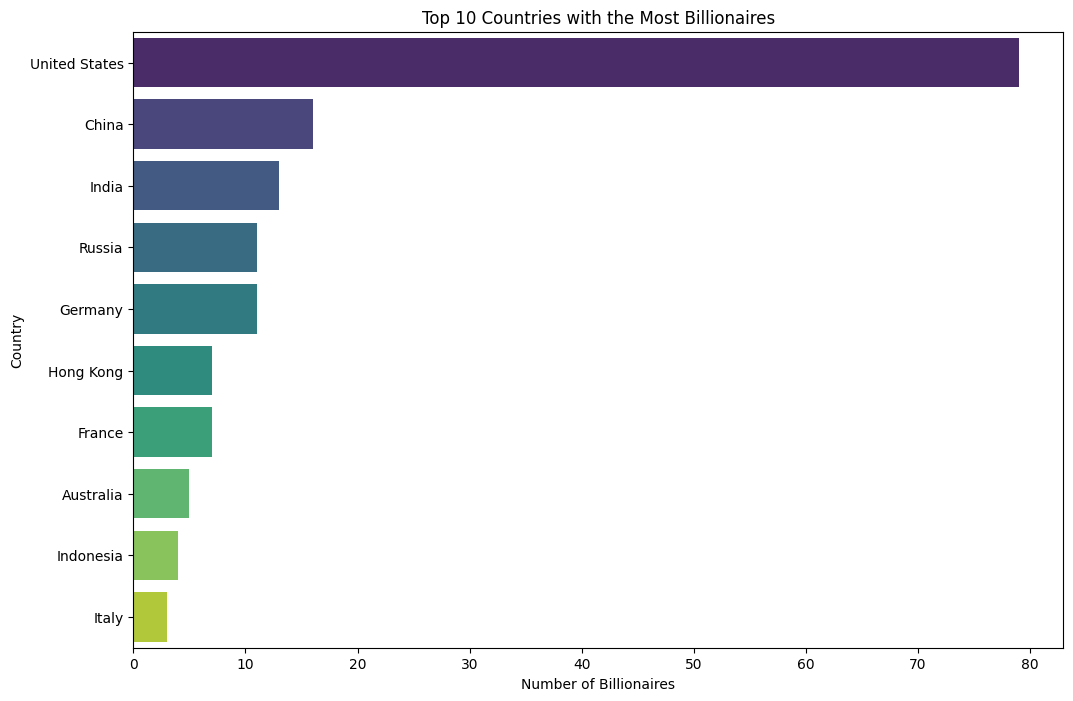

In [19]:

# Count the number of billionaires per country
country_counts = df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

### From this we can conclude that most billionaires are from unites states

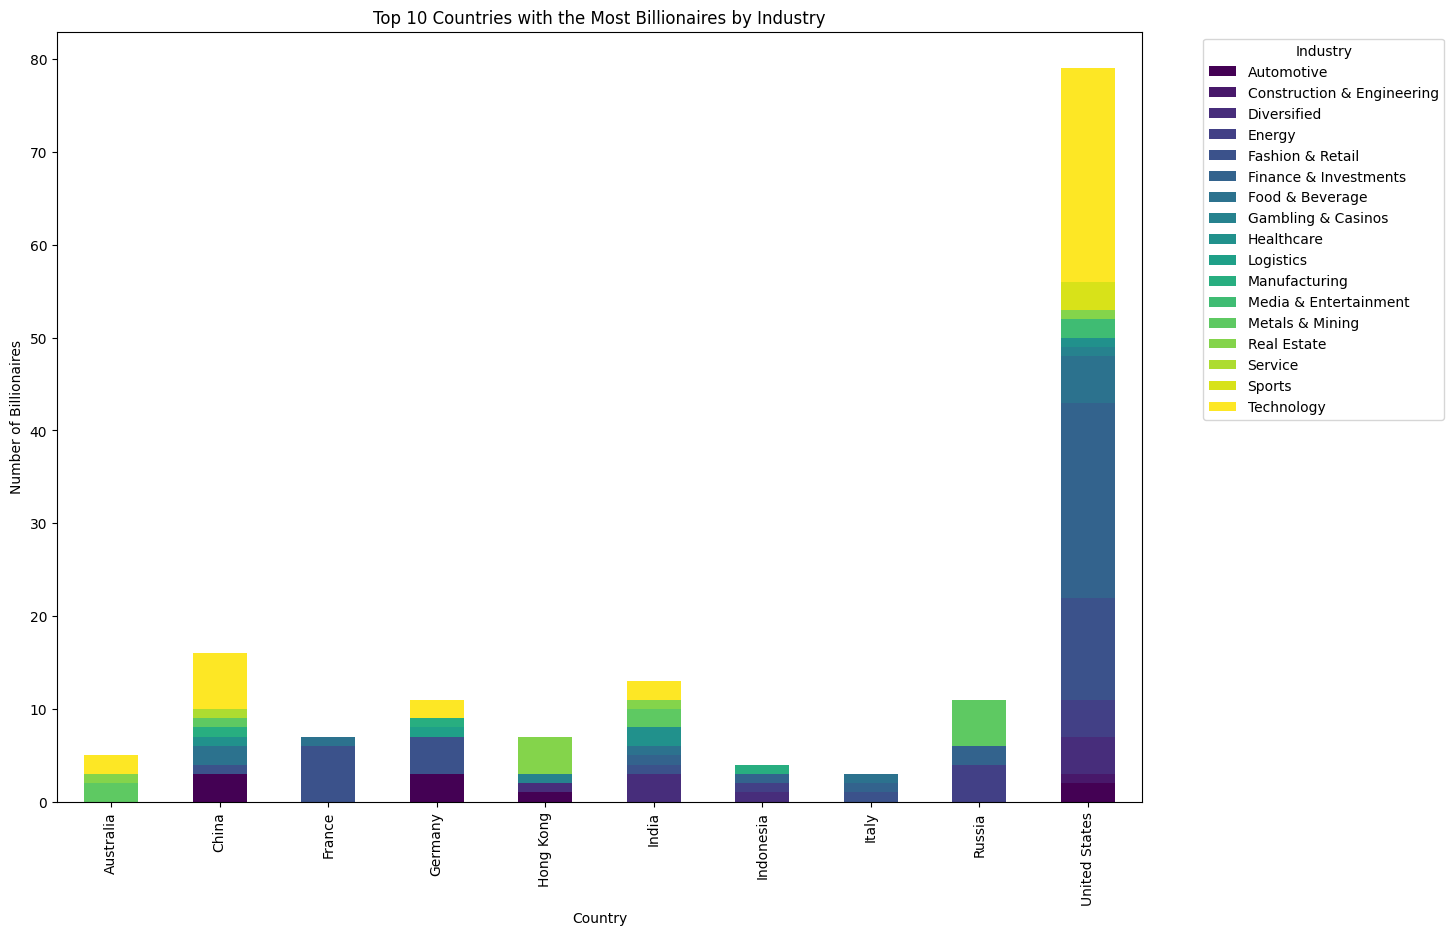

In [21]:
# Count the number of billionaires per country
country_counts = df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10).index

# Filter the DataFrame to include only the top 10 countries
top_10_df = df[df['Country'].isin(top_10_countries)]

# Count the number of billionaires per industry within each of the top 10 countries
industry_counts = top_10_df.groupby(['Country', 'Industry']).size().unstack().fillna(0)

# Plot the results
industry_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
plt.title('Top 10 Countries with the Most Billionaires by Industry')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Most of the countries except france and italy have technology as their main source

In [22]:
df.head()

,S. No.,Rank,Name,Age,Country,Networth,Industry
0,1,1,Bernard Arnault & family,75,France,233.0,Fashion & Retail
1,2,2,Elon Musk,52,United States,195.0,Automotive
2,3,3,Jeff Bezos,60,United States,194.0,Technology
3,4,4,Mark Zuckerberg,39,United States,177.0,Technology
4,5,5,Larry Ellison,79,United States,141.0,Technology


In [24]:

# Drop the 'S. No.' column
df = df.drop(columns=['Name'])

# Count the number of billionaires per country
country_counts = df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10).index

# Filter the DataFrame to include only the top 10 countries
top_10_df = df[df['Country'].isin(top_10_countries)]

# Count the number of billionaires per industry within each of the top 10 countries
industry_counts = top_10_df.groupby(['Country', 'Industry']).size().unstack().fillna(0)

# Plot the results
plt.figure(figsize=(14, 10))
industry_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
plt.title('Top 10 Countries with the Most Billionaires by Industry')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ValueError: could not convert string to float: 'Bernard Arnault & family'

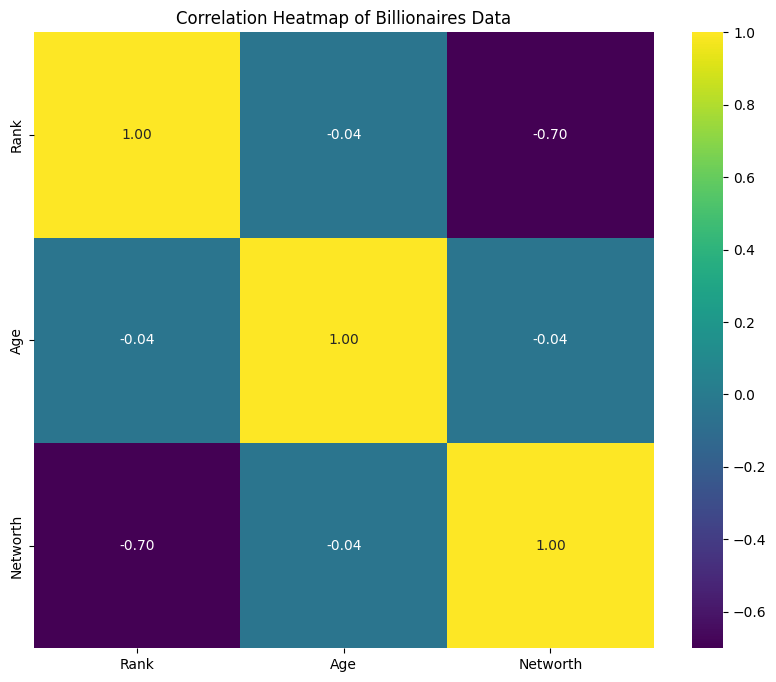

In [25]:

# Drop non-numeric columns for correlation
numeric_df = df.drop(columns=['S. No.', 'Name', 'Country', 'Industry'])

# Preprocess Networth column to convert it to numeric
numeric_df['Networth'] = df['Networth'].replace({'\$': '', ' B': ''}, regex=True).astype(float)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Billionaires Data')
plt.show()